# Position Analysis

Analysing how much better the results would be if forwards took the shots from where backs/midfielders/goalkeepers take shots

In [148]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tkinter as tk
from tkinter import simpledialog
import matplotlib as mpl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [149]:
import json
from pandas.io.json import json_normalize
import seaborn as sns
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
from matplotlib.patches import Arc
from sklearn import metrics

from functools import reduce

In [150]:
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 400)

In [151]:
folder_path = '~/Documents/GAA Analytics/2023/'

In [152]:
df = pd.read_excel(folder_path + "Football_Championship_2023_xPoint.xlsx")

In [153]:
df.head()

,Unnamed: 0.1,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,Angle,xP_Knn
0,0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,Pat Spillane,13,forward,right,n,41.83,36.958727,63.599366,108.041273,24.400634,1,1,0,3,0,27.937192,0,0.455616,-152.062808,0.4
1,1,1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,Sean Carrabine,11,forward,left,n,34.85,14.972200,75.464773,130.027800,12.535227,1,0,0,3,1,64.553022,1,0.783316,-115.446978,0.5
2,2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,Dylan McHugh,5,back,hand,n,15.03,136.421588,56.338445,136.421588,56.338445,1,1,0,1,2,-55.190701,0,0.779633,124.809299,0.9
3,3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,Darragh Cummins,18,forward,right,n,39.95,37.656712,30.659578,107.343288,57.340422,1,0,0,3,0,-19.507410,0,0.500563,160.492590,0.5
4,4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,Ian burke,13,forward,left,y,30.77,130.314219,71.037382,130.314219,71.037382,1,1,1,3,1,-61.490704,0,0.488032,118.509296,0.2


### remove placed balls

In [154]:
df['Placed_Ball'] = np.where((df['Action'] == 'point') | (df['Action'] == 'blocked')
                             | (df['Action'] == 'post') | (df['Action'] == 'short')
                             | (df['Action'] == 'wide'), 0, 1)


In [155]:
df1 = df[df['Placed_Ball'] == 0]

In [156]:
df1

,Unnamed: 0.1,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,Angle,xP_Knn
0,0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,Pat Spillane,13,forward,right,n,41.83,36.958727,63.599366,108.041273,24.400634,1,1,0,3,0,27.937192,0,0.455616,-152.062808,0.4
2,2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,Dylan McHugh,5,back,hand,n,15.03,136.421588,56.338445,136.421588,56.338445,1,1,0,1,2,-55.190701,0,0.779633,124.809299,0.9
3,3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,Darragh Cummins,18,forward,right,n,39.95,37.656712,30.659578,107.343288,57.340422,1,0,0,3,0,-19.507410,0,0.500563,160.492590,0.5
4,4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,Ian burke,13,forward,left,y,30.77,130.314219,71.037382,130.314219,71.037382,1,1,1,3,1,-61.490704,0,0.488032,118.509296,0.2
5,5,6,53,2023-05-07,Connaught Final,Sligo,Galway,1st,11,wide,Miss,Pat Spillane,13,forward,right,y,38.48,29.629885,68.558043,115.370115,19.441957,0,1,1,3,0,39.652850,0,0.355405,-140.347150,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,1117,1192,624,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,67,point,Score,Paddy Small,10,forward,right,y,19.92,19.515727,47.987054,125.484273,40.012946,1,1,1,3,0,11.546606,0,0.697520,-168.453394,0.8
1118,1118,1193,626,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,wide,Miss,Paul Mannion,11,forward,left,n,44.00,29.462013,76.676547,115.537987,11.323453,0,0,0,3,1,47.961368,0,0.375288,-132.038632,0.2
1119,1119,1194,627,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,short,Miss,Dean Rock,26,forward,right,n,42.10,36.790856,64.456948,108.209144,23.543052,0,1,0,3,0,29.075525,0,0.450275,-150.924475,0.4
1120,1120,1195,628,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,point,Score,Paul Mannion,11,forward,left,y,7.87,5.730524,38.600986,139.269476,49.399014,1,1,1,3,1,-43.293866,0,0.840780,136.706134,0.7


In [157]:
from sklearn.linear_model import LinearRegression

# Step 1: Filter shots taken by defenders
defender_shots = df1[df1['Position'] == 'back']

# Step 2: Train a linear regression model
forward_shots = df1[df1['Position'] == 'forward']

# Assuming you have additional features in your dataframe, you can select relevant features for prediction
X_train = forward_shots[['Preferred_Side', 'Pressure_Value', 'Position_Value',
       'Foot_Value', 'Shot_Angle', 'Shot_Distance', 'Placed_Ball', 'xP_adv']]  # Features for forward shots
y_train = forward_shots['Score']  # Target variable for forward shots

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Predict xP for defender shots using the trained model
X_defender = defender_shots[['Preferred_Side', 'Pressure_Value', 'Position_Value',
       'Foot_Value', 'Shot_Angle', 'Shot_Distance', 'Placed_Ball', 'xP_adv']]  # Features for defender shots
defender_shots['Predicted_xP'] = model.predict(X_defender)

# Step 4: Update xP values in the dataframe for shots taken by defenders
df1.loc[df1['Position'] == 'back', 'xP_adv1'] = defender_shots['Predicted_xP']

/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_25823/2815603947.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defender_shots['Predicted_xP'] = model.predict(X_defender)
/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_25823/2815603947.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1['Position'] == 'back', 'xP_adv1'] = defender_shots['Predicted_xP']


In [158]:
df1.head(30)

,Unnamed: 0.1,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,Angle,xP_Knn,xP_adv1
0,0,0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,Pat Spillane,13,forward,right,n,41.83,36.958727,63.599366,108.041273,24.400634,1,1,0,3,0,27.937192,0,0.455616,-152.062808,0.4,NaN
2,2,2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,Dylan McHugh,5,back,hand,n,15.03,136.421588,56.338445,136.421588,56.338445,1,1,0,1,2,-55.190701,0,0.779633,124.809299,0.9,0.859956
3,3,3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,Darragh Cummins,18,forward,right,n,39.95,37.656712,30.659578,107.343288,57.340422,1,0,0,3,0,-19.507410,0,0.500563,160.492590,0.5,NaN
4,4,4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,Ian burke,13,forward,left,y,30.77,130.314219,71.037382,130.314219,71.037382,1,1,1,3,1,-61.490704,0,0.488032,118.509296,0.2,NaN
5,5,6,53,2023-05-07,Connaught Final,Sligo,Galway,1st,11,wide,Miss,Pat Spillane,13,forward,right,y,38.48,29.629885,68.558043,115.370115,19.441957,0,1,1,3,0,39.652850,0,0.355405,-140.347150,0.5,NaN
6,6,7,55,2023-05-07,Connaught Final,Sligo,Galway,1st,13,wide,Miss,Brian Cox,5,back,right,y,38.92,38.180201,51.556863,106.819799,36.443137,0,1,1,1,0,11.195638,0,0.270428,-168.804362,0.7,0.427543
7,7,8,54,2023-05-07,Connaught Final,Galway,Sligo,1st,13,point,Score,Cillian McDaid,7,back,hand,y,9.09,142.703452,52.796532,142.703452,52.796532,1,1,1,1,2,-75.368148,0,0.745389,104.631852,0.9,0.828577
9,9,10,57,2023-05-07,Connaught Final,Galway,Sligo,1st,17,point,Score,Matthew Tierney,10,forward,hand,n,11.99,139.562520,33.316012,139.562520,33.316012,1,1,0,3,2,63.026758,0,0.853983,-116.973242,0.8,NaN
10,10,11,58,2023-05-07,Connaught Final,Sligo,Galway,1st,21,blocked,Miss,Pat Spillane,13,forward,left,y,23.42,7.992350,21.981892,137.007650,66.018108,0,1,1,3,1,-70.049615,0,0.626250,109.950385,0.6,NaN
13,13,15,62,2023-05-07,Connaught Final,Sligo,Galway,1st,29,wide,Miss,Sean Carrabine,11,forward,left,y,42.21,42.193615,42.702081,102.806385,45.297919,0,1,1,3,1,-1.761922,0,0.274326,178.238078,0.4,NaN


In [159]:
bk = df1[df1['Position'] == 'back']

In [160]:
bk.groupby('TeamName').mean()

/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_25823/1346069097.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bk.groupby('TeamName').mean()


,Unnamed: 0.1,index,Unnamed: 0,Minute,PlayerNumber,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,Angle,xP_Knn,xP_adv1
TeamName,,,,,,,,,,,,,,,,,,,,,
Armagh,481.916667,515.083333,871.833333,39.666667,4.666667,34.924167,72.778310,51.313486,116.164050,46.165732,0.583333,0.666667,0.500000,1.0,1.083333,-3.141913,0.0,0.385413,26.858087,0.633333,0.506613
Clare,66.000000,71.500000,118.500000,30.000000,5.500000,31.860000,83.461977,28.910759,119.352242,37.491736,0.500000,0.500000,0.500000,1.0,0.000000,21.296895,0.0,0.468288,21.296895,0.700000,0.587844
Cork,757.300000,803.600000,353.800000,31.500000,5.500000,29.087000,73.265227,40.698548,124.728342,32.737658,0.300000,0.900000,0.500000,1.0,0.700000,25.468146,0.0,0.492826,-82.531854,0.540000,0.606420
Derry,603.250000,645.750000,849.083333,36.250000,5.500000,29.457500,42.751952,44.864008,118.494853,43.924575,0.250000,0.583333,0.500000,1.0,0.500000,-1.267312,0.0,0.495838,28.732688,0.633333,0.613274
Dublin,676.695652,721.739130,732.739130,42.565217,9.130435,27.270435,78.140875,47.414460,120.972239,41.456270,0.434783,0.608696,0.565217,1.0,0.478261,5.312811,0.0,0.523272,-2.513276,0.660870,0.637925
Galway,162.500000,175.700000,659.600000,30.600000,5.600000,28.829000,79.396214,49.478203,121.812639,48.434032,0.500000,0.700000,0.500000,1.0,0.600000,-16.925255,0.0,0.506606,55.074745,0.670000,0.625180
Kerry,544.470588,580.882353,631.647059,32.882353,3.941176,31.301176,86.944593,46.488464,119.925939,52.962319,0.352941,0.764706,0.411765,1.0,0.882353,-19.780140,0.0,0.471019,54.337507,0.617647,0.587788
Kildare,673.500000,716.500000,669.500000,54.000000,5.500000,22.875000,15.103073,60.621945,129.896927,27.378055,0.500000,1.000000,0.000000,1.0,0.000000,45.595350,0.0,0.694486,-134.404650,0.850000,0.787930
Louth,454.500000,484.833333,338.000000,42.833333,5.666667,29.475000,80.728202,46.063208,123.045746,43.752804,0.333333,0.500000,0.833333,1.0,0.166667,13.163834,0.0,0.451296,-46.836166,0.550000,0.579887


In [161]:
mean_column1 = bk['xP_adv'].mean()
mean_column2 = bk['xP_adv1'].mean()

# Find the difference between the means
difference = mean_column2 - mean_column1

### The difference in xP if the shots taken by backs were taken by forwards

In [162]:
difference

0.11919879433333402

## Calculate the same for goalkeepers

In [163]:
df2 = df[df['Placed_Ball'] == 0]

In [164]:
# Step 1: Filter shots taken by defenders
gk_shots = df2[df2['Position'] == 'goalkeeper']

# Step 2: Train a linear regression model
forward_shots = df2[df2['Position'] == 'forward']

# Assuming you have additional features in your dataframe, you can select relevant features for prediction
X_train = forward_shots[['Preferred_Side', 'Pressure_Value', 'Position_Value',
       'Foot_Value', 'Shot_Angle', 'Shot_Distance', 'Placed_Ball', 'xP_adv']]  # Features for forward shots
y_train = forward_shots['Score']  # Target variable for forward shots

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Predict xP for defender shots using the trained model
X_gk = gk_shots[['Preferred_Side', 'Pressure_Value', 'Position_Value',
       'Foot_Value', 'Shot_Angle', 'Shot_Distance', 'Placed_Ball', 'xP_adv']]  # Features for defender shots
gk_shots['Predicted_xP'] = model.predict(X_gk)

# Step 4: Update xP values in the dataframe for shots taken by defenders
df2.loc[df2['Position'] == 'goalkeeper', 'xP_adv1'] = gk_shots['Predicted_xP']

/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_25823/3184213011.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gk_shots['Predicted_xP'] = model.predict(X_gk)
/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_25823/3184213011.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2['Position'] == 'goalkeeper', 'xP_adv1'] = gk_shots['Predicted_xP']


In [165]:
gk = df2[df2['Position'] == 'goalkeeper']
gk

,Unnamed: 0.1,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,Angle,xP_Knn,xP_adv1
163,163,180,1109,2023-05-14,Ulster Final,Armagh,Derry,1st,15,wide,Miss,Ethan Raferty,1,goalkeeper,left,n,47.49,98.032413,51.025576,98.032413,51.025576,0,1,0,0,1,-8.507425,0,0.214961,171.492575,0.9,0.397013
167,167,184,1113,2023-05-14,Ulster Final,Derry,Armagh,1st,19,wide,Miss,Odhran Lynch,1,goalkeeper,right,n,44.63,35.911750,70.506095,109.088250,17.493905,0,1,0,0,0,36.430655,0,0.271472,-143.569345,0.1,0.473454
182,182,199,1128,2023-05-14,Ulster Final,Armagh,Derry,2nd,44,wide,Miss,Ethan Raferty,1,goalkeeper,left,n,39.82,33.294306,65.835198,111.705694,22.164802,0,0,0,0,1,33.257815,0,0.316944,-146.742185,0.5,0.496260
189,189,206,1135,2023-05-14,Ulster Final,Armagh,Derry,2nd,55,point,Score,Ethan Raferty,1,goalkeeper,right,n,44.32,44.287570,42.281479,100.712430,45.718521,1,0,0,0,0,-2.222173,0,0.282025,177.777827,0.4,0.476914
209,209,226,1093,2023-05-14,Ulster Final,Armagh,Derry,2nd,86,point,Score,Ethan Raferty,1,goalkeeper,right,n,41.22,39.401670,56.094940,105.598330,31.905060,1,1,0,0,0,17.064662,0,0.329623,-162.935338,0.3,0.533232
471,471,507,262,2023-06-03,All Ireland Group R2,Armagh,Tyrone,1st,10,wide,Miss,Ethan Rafferty,1,goalkeeper,left,n,44.98,44.069449,34.976284,100.930551,53.023716,0,1,0,0,1,-11.571998,0,0.249269,168.428002,0.6,0.439831
521,521,559,278,2023-06-03,All Ireland Group R2,Tyrone,Armagh,1st,35,wide,Miss,Niall Morgan,1,goalkeeper,right,n,45.97,99.035767,43.299779,99.035767,43.299779,0,1,0,0,0,0.872779,0,0.258762,-179.127221,0.5,0.462358
614,614,654,228,2023-06-04,All Ireland Group R2,Mayo,Louth,1st,35,wide,Miss,Colm Reape,1,goalkeeper,right,n,46.34,98.686774,45.690570,98.686774,45.690570,0,0,0,0,0,-2.090537,0,0.252145,177.909463,0.6,0.444100
663,663,704,376,2023-06-17,All Ireland Group R3,Monaghan,Donegal,1st,30,wide,Miss,Rory Beggan,1,goalkeeper,right,n,31.20,30.284246,36.481597,114.715754,51.518403,0,0,0,0,0,-13.942439,0,0.517191,166.057561,0.8,0.679824
772,772,820,889,2023-06-24,All Ireland Preliminary Quarter Final,Monaghan,Kildare,2nd,60,short,Miss,Rory Beggan,1,goalkeeper,right,n,43.52,101.478714,44.207394,101.478714,44.207394,0,0,0,0,0,-0.273032,0,0.294015,179.726968,0.5,0.489118


In [166]:
mean_column1 = gk['xP_adv'].mean()
mean_column2 = gk['xP_adv1'].mean()

# Find the difference between the means
difference1 = mean_column2 - mean_column1

### The difference in xP if the shots taken by goalkeepers were taken by forwards

difference1

0.19388981807570682

### Calculate the same for midfielders

In [167]:
## Calculate the same for midfielders

df3 = df[df['Placed_Ball'] == 0]

# Step 1: Filter shots taken by defenders
md_shots = df3[df3['Position'] == 'midfielder']

# Step 2: Train a linear regression model
forward_shots = df3[df3['Position'] == 'forward']

# Assuming you have additional features in your dataframe, you can select relevant features for prediction
X_train = forward_shots[['Preferred_Side', 'Pressure_Value', 'Position_Value',
       'Foot_Value', 'Shot_Angle', 'Shot_Distance', 'Placed_Ball', 'xP_adv']]  # Features for forward shots
y_train = forward_shots['Score']  # Target variable for forward shots

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Predict xP for defender shots using the trained model
X_md = md_shots[['Preferred_Side', 'Pressure_Value', 'Position_Value',
       'Foot_Value', 'Shot_Angle', 'Shot_Distance', 'Placed_Ball', 'xP_adv']]  # Features for defender shots
md_shots['Predicted_xP'] = model.predict(X_md)

# Step 4: Update xP values in the dataframe for shots taken by defenders
df3.loc[df3['Position'] == 'midfielder', 'xP_adv1'] = md_shots['Predicted_xP']

md = df3[df3['Position'] == 'midfielder']


mean_column1 = md['xP_adv'].mean()
mean_column2 = md['xP_adv1'].mean()

# Find the difference between the means
difference2 = mean_column2 - mean_column1

### The difference in xP if the shots taken by midfielders were taken by forwards

difference2

/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_25823/2184781857.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md_shots['Predicted_xP'] = model.predict(X_md)
/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_25823/2184781857.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[df3['Position'] == 'midfielder', 'xP_adv1'] = md_shots['Predicted_xP']


0.06302074774702016

In [168]:
md

,Unnamed: 0.1,index,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Preferred_Side,Pressure_Value,Position_Value,Foot_Value,Shot_Angle,Placed_Ball,xP_adv,Angle,xP_Knn,xP_adv1
25,25,27,74,2023-05-07,Connaught Final,Galway,Sligo,2nd,44,short,Miss,Peter Cooke,12,midfielder,right,n,31.37,20.032591,68.137441,124.967409,19.862559,0,1,0,2,0,50.309414,0,0.597097,-129.690586,0.5,0.638620
27,27,29,76,2023-05-07,Connaught Final,Galway,Sligo,2nd,49,point,Score,Peter Cooke,12,midfielder,right,n,38.20,26.139960,71.856449,118.860040,16.143551,1,1,0,2,0,46.820760,0,0.470243,-133.179240,0.3,0.538055
35,35,37,84,2023-05-07,Connaught Final,Galway,Sligo,2nd,59,blocked,Miss,John Maher,9,midfielder,right,y,21.26,21.254065,43.521148,123.745935,44.478852,0,0,1,2,0,-1.290649,0,0.632067,178.709351,1.0,0.670106
43,43,45,90,2023-05-07,Connaught Final,Sligo,Galway,2nd,70,point,Score,Paul Kilcoyne,9,midfielder,left,n,29.67,118.622970,30.416072,118.622970,30.416072,1,0,0,2,1,27.248052,0,0.598169,-152.751948,0.6,0.617754
128,128,138,547,2023-05-14,Leinster Final,Louth,Dublin,2nd,43,wide,Miss,Tommy Durnin,8,midfielder,left,y,35.39,110.072654,38.274690,110.072654,38.274690,0,0,1,2,1,9.309166,0,0.337416,-170.690834,0.7,0.415117
164,164,181,1110,2023-05-14,Ulster Final,Derry,Armagh,1st,16,point,Score,Brendan Rogers,9,midfielder,right,y,32.63,28.408411,60.057453,116.591589,27.942547,1,1,1,2,0,29.476691,0,0.415966,-150.523309,0.8,0.504669
169,169,186,1115,2023-05-14,Ulster Final,Derry,Armagh,1st,22,point,Score,Brendan Rogers,9,midfielder,right,y,39.81,39.750667,46.243994,105.249333,41.756006,1,1,1,2,0,3.231016,0,0.298320,-176.768984,0.6,0.401834
188,188,205,1134,2023-05-14,Ulster Final,Derry,Armagh,2nd,53,point,Score,Conor Glass,8,midfielder,right,n,23.80,121.240414,42.635670,121.240414,42.635670,1,1,0,2,0,3.286446,0,0.733606,-176.713554,0.6,0.770243
194,194,211,1140,2023-05-14,Ulster Final,Derry,Armagh,2nd,67,wide,Miss,Brendan Rogers,9,midfielder,hand,n,11.16,142.005467,33.249602,142.005467,33.249602,0,1,0,2,2,74.434776,0,0.834937,-105.565224,0.9,0.875643
242,242,262,705,2023-05-20,All Ireland Group R1,Mayo,Kerry,1st,21,blocked,Miss,Diamuid O'Connor,9,midfielder,right,y,28.39,132.233678,18.639212,132.233678,18.639212,0,1,1,2,0,63.279854,0,0.486702,-116.720146,0.7,0.558215


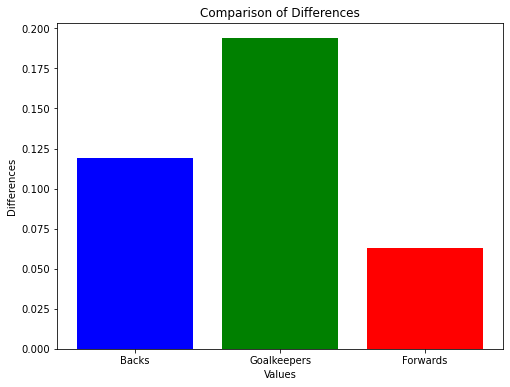

In [170]:

# Names for the bars
labels = ['Backs', 'Goalkeepers', 'Forwards']

# Values for the bars
values = [difference, difference1, difference2]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green', 'red'])
plt.xlabel('Values')
plt.ylabel('Differences')
plt.title('Comparison of Differences')
plt.show()


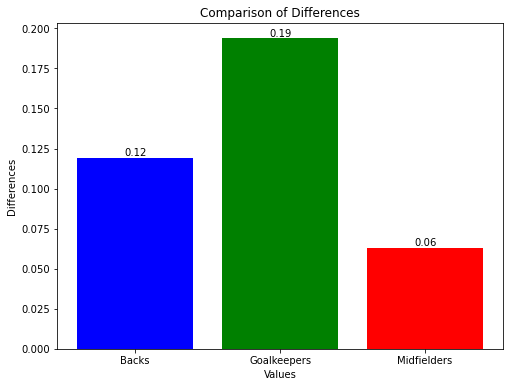

In [172]:

# Names for the bars
labels = ['Backs', 'Goalkeepers', 'Midfielders']

# Values for the bars
values = [difference, difference1, difference2]

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['blue', 'green', 'red'])
plt.xlabel('Values')
plt.ylabel('Differences')
plt.title('Comparison of Differences')

# Add values at the end of each bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', 
             ha='center', va='bottom')

plt.show()
